<a href="https://colab.research.google.com/github/Sviatyi/google-colab/blob/main/LAB4NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from torch.utils import data
from torchinfo import summary
import torch.nn as nn
import torch.optim as optim
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [22]:
df = pd.read_csv("SVT.csv")

In [23]:
def walk_forward(dataset, window_size):
    data, label = [], []
    for i in range(len(dataset)-window_size-1):
        data.append(dataset[i:(i+window_size)])
        label.append(dataset[i + window_size])
    return np.array(data), np.array(label)

In [52]:
window_size = 5
x_train, x_test, y_train, y_test = train_test_split(*walk_forward(df["Close"], window_size),test_size=0.2,shuffle=False)


In [25]:
linear_regression = LinearRegression()
linear_regression.fit(x_train,y_train)
y_pred = linear_regression.predict(x_test)


In [20]:
def plot_(actual, predicted):
    plt.plot(actual, label='Actual')
    plt.plot(predicted, label='Predicted')
    plt.legend()
    plt.show()

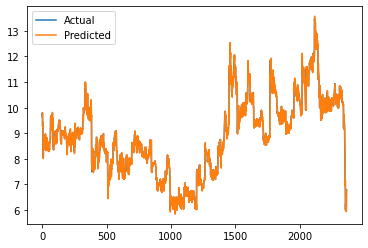

In [26]:
plot_(y_test, y_pred)

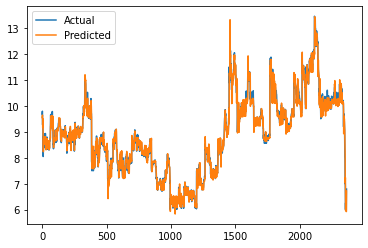

In [28]:
random_forest_regressor = RandomForestRegressor(max_depth=8, random_state=0)
random_forest_regressor.fit(x_train,y_train)
y_pred = random_forest_regressor.predict(x_test)
plot_(y_test, y_pred)

In [39]:
model = Sequential()
model.add(layers.LSTM(50, input_shape = (5,1), return_sequences = True))
model.add(layers.Dropout(0.5))
model.add(layers.LSTM(256))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))
model.add(layers.Activation("linear"))
model.compile(loss="mse", optimizer="adam")
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 5, 50)             10400     
                                                                 
 dropout_12 (Dropout)        (None, 5, 50)             0         
                                                                 
 lstm_11 (LSTM)              (None, 256)               314368    
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 1)                 257       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 325,025
Trainable params: 325,025
Non-tr

In [41]:
history = model.fit(x_train,y_train,epochs=30)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


296/296 [==============================] - 30s 101ms/step - loss: 0.2305
Epoch 2/30
296/296 [==============================] - 24s 81ms/step - loss: 0.2123
Epoch 3/30
296/296 [==============================] - 24s 80ms/step - loss: 0.2152
Epoch 4/30
296/296 [==============================] - 24s 82ms/step - loss: 0.2159
Epoch 5/30
296/296 [==============================] - 24s 81ms/step - loss: 0.2146
Epoch 6/30
296/296 [==============================] - 24s 82ms/step - loss: 0.2015
Epoch 7/30
296/296 [==============================] - 25s 83ms/step - loss: 0.2116
Epoch 8/30
296/296 [==============================] - 29s 97ms/step - loss: 0.1900
Epoch 9/30
296/296 [==============================] - 24s 82ms/step - loss: 0.1982
Epoch 10/30
296/296 [==============================] - 24s 83ms/step - loss: 0.2107
Epoch 11/30
296/296 [==============================] - 24s 82ms/step - loss: 0.2018
Epoch 12/30
296/296 [==============================] - 24s 82ms/step - loss: 0.1945
Epoch 13/30

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


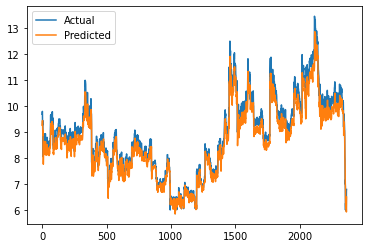

In [42]:
y_pred = model.predict(x_test)
plot_(y_test, y_pred)

In [44]:
model = Sequential()
model.add(layers.Conv1D(32, kernel_size=1, activation='relu', padding='same', input_shape=(1,1,5)))
model.add(layers.Conv1D(64, kernel_size=1, activation='relu', padding='same'))
model.add(layers.Dropout(0.2))
model.add(layers.Reshape((1,64)))
model.add(layers.LSTM(256,return_sequences=True))
model.add(layers.Dropout(0.5))
model.add(layers.LSTM(256))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='linear'))
model.compile(optimizer = 'adam', loss = 'mse')
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 1, 1, 32)          192       
                                                                 
 conv1d_7 (Conv1D)           (None, 1, 1, 64)          2112      
                                                                 
 dropout_17 (Dropout)        (None, 1, 1, 64)          0         
                                                                 
 reshape_3 (Reshape)         (None, 1, 64)             0         
                                                                 
 lstm_14 (LSTM)              (None, 1, 256)            328704    
                                                                 
 dropout_18 (Dropout)        (None, 1, 256)            0         
                                                                 
 lstm_15 (LSTM)              (None, 256)              

In [49]:
x_train_reshaped = x_train.reshape(x_train.shape[0],1,1,5)
x_test_reshaped = x_test.reshape(x_test.shape[0],1,1,5)
history = model.fit(x_train_reshaped,y_train,epochs=30)

Epoch 1/30
  1/296 [..............................] - ETA: 30s - loss: 16.8425

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


296/296 [==============================] - 26s 88ms/step - loss: 1.8997
Epoch 2/30
296/296 [==============================] - 21s 69ms/step - loss: 0.5790
Epoch 3/30
296/296 [==============================] - 20s 66ms/step - loss: 0.4606
Epoch 4/30
296/296 [==============================] - 20s 66ms/step - loss: 0.4267
Epoch 5/30
296/296 [==============================] - 20s 68ms/step - loss: 0.3813
Epoch 6/30
296/296 [==============================] - 20s 66ms/step - loss: 0.3400
Epoch 7/30
296/296 [==============================] - 20s 66ms/step - loss: 0.3465
Epoch 8/30
296/296 [==============================] - 19s 65ms/step - loss: 0.3114
Epoch 9/30
296/296 [==============================] - 19s 66ms/step - loss: 0.3209
Epoch 10/30
296/296 [==============================] - 20s 67ms/step - loss: 0.2838
Epoch 11/30
296/296 [==============================] - 21s 71ms/step - loss: 0.2842
Epoch 12/30
296/296 [==============================] - 19s 66ms/step - loss: 0.2596
Epoch 13/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


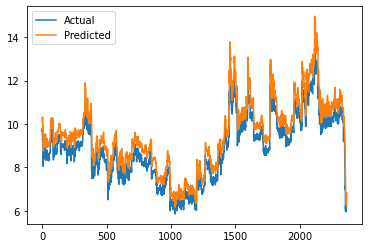

In [50]:
y_pred = model.predict(x_test_reshaped)
plot_(y_test, y_pred)